**DATA PREPROCESSING**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder

In [3]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['Train_Test_Network.csv']))
df.head()

Saving Train_Test_Network.csv to Train_Test_Network (1).csv


,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_query,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,ssl_cipher,ssl_resumed,ssl_established,ssl_subject,ssl_issuer,http_trans_depth,http_method,http_uri,http_version,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1554198358,3.122.49.24,1883,192.168.1.152,52976,tcp,-,80549.530260,1762852,41933215,OTH,0,252181,14911156,2,236,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
1,1554198358,192.168.1.79,47260,192.168.1.255,15600,udp,-,0.000000,0,0,S0,0,1,63,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,0,normal
2,1554198359,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.000000,0,0,OTH,0,0,0,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
3,1554198359,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,OTH,0,0,0,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,0,normal
4,1554198362,192.168.1.152,46608,192.168.1.190,53,udp,dns,0.000549,0,298,SHR,0,0,0,2,354,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,bad_UDP_checksum,-,F,0,normal


In [4]:
df.shape

(461043, 45)

In [5]:
df.drop(columns=['label','ts'],inplace=True)

In [6]:
df.src_ip.value_counts()

192.168.1.190      77033
192.168.1.152      67784
192.168.1.30       61637
192.168.1.79       41098
192.168.1.195      36089
                   ...  
113.8.137.186          1
109.194.200.250        1
209.24.125.50          1
110.229.186.133        1
56.180.141.199         1
Name: src_ip, Length: 11536, dtype: int64

In [7]:
df.isnull().sum()

src_ip                    0
src_port                  0
dst_ip                    0
dst_port                  0
proto                     0
service                   0
duration                  0
src_bytes                 0
dst_bytes                 0
conn_state                0
missed_bytes              0
src_pkts                  0
src_ip_bytes              0
dst_pkts                  0
dst_ip_bytes              0
dns_query                 0
dns_qclass                0
dns_qtype                 0
dns_rcode                 0
dns_AA                    0
dns_RD                    0
dns_RA                    0
dns_rejected              0
ssl_version               0
ssl_cipher                0
ssl_resumed               0
ssl_established           0
ssl_subject               0
ssl_issuer                0
http_trans_depth          0
http_method               0
http_uri                  0
http_version              0
http_request_body_len     0
http_response_body_len    0
http_status_code    

In [8]:
df.dns_AA.value_counts()

-    365158
F     81279
T     14606
Name: dns_AA, dtype: int64

In [9]:
df.dns_RD.value_counts()

-    365158
F     63106
T     32779
Name: dns_RD, dtype: int64

In [10]:
df.dns_RA.value_counts()

-    365158
F     85997
T      9888
Name: dns_RA, dtype: int64

In [11]:
df.dns_rejected.value_counts()

-    365158
F     89392
T      6493
Name: dns_rejected, dtype: int64

In [12]:
df.http_uri.value_counts()

-                                                                                                                    460809
/no_nonce_string/                                                                                                        15
/dvwa/login.php-r                                                                                                        13
/no_nonce_string/ContentDirectory/scpd.xml                                                                               12
/d/msdownload/update/software/defu/2019/02/updateplatform_23725566d66a26c81fbfaf79701b727f92a650ea.exe                    9
                                                                                                                      ...  
/d/msdownload/update/others/2019/04/28701422_19fc1c232bf7eb4d3ddd097afebcaa3a0479d76c.cab                                 1
/MFEwTzBNMEswSTAJBgUrDgMCGgUABBTBL0V27RVZ7LBduom/nYB45SPUEwQU5Z1ZMIJHWMys+ghUNoZ7OrUETfACEA8sEMlbBsCTf7jUSfg+hWk=         1
/d/msdow

In [13]:
df.http_uri.value_counts()

-                                                                                                                    460809
/no_nonce_string/                                                                                                        15
/dvwa/login.php-r                                                                                                        13
/no_nonce_string/ContentDirectory/scpd.xml                                                                               12
/d/msdownload/update/software/defu/2019/02/updateplatform_23725566d66a26c81fbfaf79701b727f92a650ea.exe                    9
                                                                                                                      ...  
/d/msdownload/update/others/2019/04/28701422_19fc1c232bf7eb4d3ddd097afebcaa3a0479d76c.cab                                 1
/MFEwTzBNMEswSTAJBgUrDgMCGgUABBTBL0V27RVZ7LBduom/nYB45SPUEwQU5Z1ZMIJHWMys+ghUNoZ7OrUETfACEA8sEMlbBsCTf7jUSfg+hWk=         1
/d/msdow

In [14]:
df.drop(columns=['http_uri'],inplace=True)

In [15]:
df.shape

(461043, 42)

In [16]:
df.weird_notice.value_counts()

-    459749
F      1294
Name: weird_notice, dtype: int64

In [17]:
df.weird_name.value_counts()

-                                   459749
DNS_RR_unknown_type                    753
active_connection_reuse                275
data_before_established                109
bad_UDP_checksum                        68
bad_TCP_checksum                        52
connection_originator_SYN_ack           20
above_hole_data_without_any_acks         6
inappropriate_FIN                        3
dnp3_corrupt_header_checksum             3
possible_split_routing                   3
TCP_ack_underflow_or_misorder            2
Name: weird_name, dtype: int64

In [18]:
df.weird_addl.value_counts()

-     460290
46       707
48        38
43         8
Name: weird_addl, dtype: int64

In [19]:
df.http_response_body_len.value_counts()

0          460821
2              33
1806           14
941            12
1048576        12
            ...  
7321            1
7323            1
728216          1
7317            1
664             1
Name: http_response_body_len, Length: 68, dtype: int64

In [20]:
df.http_request_body_len.value_counts()

0       461029
300          6
1242         5
1272         1
1586         1
2338         1
Name: http_request_body_len, dtype: int64

In [21]:
df.http_version.value_counts()

-      460801
1.1       242
Name: http_version, dtype: int64

In [22]:
df.http_user_agent.value_counts()

-                                                                                                                                    460809
Microsoft-Delivery-Optimization/10.0                                                                                                     57
Microsoft-Windows/10.0 UPnP/1.0                                                                                                          32
Ruby                                                                                                                                     31
DAFUPnP                                                                                                                                  19
User-Agent: Microsoft-DLNA DLNADOC/1.50                                                                                                  19
Windows-Update-Agent/10.0.10011.16384 Client-Protocol/1.91                                                                               11
MICROSOFT_DEVICE_MET

In [23]:
df.http_status_code.value_counts()

0      460801
200       160
206        53
302        13
404        11
403         2
304         2
101         1
Name: http_status_code, dtype: int64

In [24]:
df.type.value_counts()

normal        300000
backdoor       20000
xss            20000
injection      20000
dos            20000
ddos           20000
scanning       20000
password       20000
ransomware     20000
mitm            1043
Name: type, dtype: int64

In [25]:
df.http_orig_mime_types.value_counts()

-                       461029
application/xml              8
application/soap+xml         6
Name: http_orig_mime_types, dtype: int64

In [26]:
df.http_resp_mime_types.value_counts()

-                                    460883
application/xml                          63
text/html                                41
image/png                                15
application/vnd.ms-cab-compressed        13
text/plain                               11
application/ocsp-response                 8
image/jpeg                                4
text/json                                 4
application/x-debian-package              1
Name: http_resp_mime_types, dtype: int64

In [27]:
df.http_method.value_counts()

-       460809
GET        215
POST        15
HEAD         4
Name: http_method, dtype: int64

In [28]:
df.http_trans_depth.value_counts()

-     460796
1        214
2         25
8          1
9          1
10         1
3          1
4          1
6          1
7          1
5          1
Name: http_trans_depth, dtype: int64

In [29]:
df.ssl_version.value_counts()

-         460737
TLSv12       188
TLSv13       116
TLSv10         2
Name: ssl_version, dtype: int64

In [30]:
df.ssl_cipher.value_counts()

-                                          460737
TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256         176
TLS_AES_128_GCM_SHA256                        116
TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384          11
TLS_ECDHE_RSA_WITH_AES_256_CBC_SHA              2
TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256         1
Name: ssl_cipher, dtype: int64

In [31]:
df.ssl_resumed.value_counts()

-    460352
F       605
T        86
Name: ssl_resumed, dtype: int64

In [32]:
df.ssl_established.value_counts()

-    460352
F       596
T        95
Name: ssl_established, dtype: int64

In [33]:
df.ssl_subject.value_counts()

-                                                                                           461034
CN=*.wns.windows.com                                                                             4
CN=Mr Shepherd;OU=Security Shepherd Project;O=OWASP;L=Dublin;ST=Ireland;C=IE                     2
CN=*.events.data.microsoft.com;OU=Microsoft;O=Microsoft Corporation;L=Redmond;ST=WA;C=US         1
CN=sls.update.microsoft.com;OU=DSP;O=Microsoft;L=Redmond;ST=WA;C=US                              1
CN=settings-win.data.microsoft.com;OU=WSE;O=Microsoft;L=Redmond;ST=WA;C=US                       1
Name: ssl_subject, dtype: int64

In [34]:
df.ssl_issuer.value_counts()

-                                                                                                461034
CN=Microsoft IT TLS CA 5;OU=Microsoft IT;O=Microsoft Corporation;L=Redmond;ST=Washington;C=US         4
CN=Microsoft Secure Server CA 2011;O=Microsoft Corporation;L=Redmond;ST=Washington;C=US               2
CN=Mr Shepherd;OU=Security Shepherd Project;O=OWASP;L=Dublin;ST=Ireland;C=IE                          2
CN=Microsoft Update Secure Server CA 2.1;O=Microsoft Corporation;L=Redmond;ST=Washington;C=US         1
Name: ssl_issuer, dtype: int64

In [35]:
df.dns_rejected.value_counts()


-    365158
F     89392
T      6493
Name: dns_rejected, dtype: int64

In [36]:
df.dns_rcode.value_counts()

0    448777
3     10510
5      1187
2       565
1         4
Name: dns_rcode, dtype: int64

In [37]:
df.dns_qtype.value_counts()

0      366377
1       36080
12      21932
28      20282
43       9061
255      5082
2        1284
48        667
32        210
33         59
6           6
16          3
Name: dns_qtype, dtype: int64

In [38]:
df.dns_query.value_counts()

-                                                                           366019
a2z3kk2ebqzso7.iot.ap-southeast-2.amazonaws.com                              13700
arpa.whois-servers.net                                                        2198
_sleep-proxy._udp.local                                                       2187
testphp.vulnweb.com                                                           1848
                                                                             ...  
193.208.24.253.in-addr.arpa                                                      1
d.b.6.c.f.3.e.f.f.f.1.f.2.4.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.8.e.f.ip6.arpa         1
ns1.mentorg.com                                                                  1
85.20.114.in-addr.arpa                                                           1
254.63.100.19.in-addr.arpa                                                       1
Name: dns_query, Length: 14149, dtype: int64

In [39]:
df.dns_qclass.value_counts()

0        366377
1         92700
32769      1966
Name: dns_qclass, dtype: int64

In [40]:
df.src_pkts.value_counts()

1        216270
0        112544
2         40133
5         38815
6         14619
          ...  
142           1
4237          1
3984          1
147           1
10602         1
Name: src_pkts, Length: 414, dtype: int64

In [41]:
df.src_ip_bytes.value_counts()

0       112544
63       34677
40       28277
48       19614
44       18513
         ...  
1673         1
2894         1
2234         1
5850         1
4094         1
Name: src_ip_bytes, Length: 4549, dtype: int64

In [42]:
df.dst_pkts.value_counts()

0        233281
1        129446
2         23239
5         16992
6         13589
          ...  
121           1
1657          1
13951         1
122           1
89            1
Name: dst_pkts, Length: 332, dtype: int64

In [43]:
df.dst_ip_bytes.value_counts()

0        233281
40        45570
60        10800
354        8341
12815      4367
          ...  
4450          1
6499          1
48354         1
10693         1
4337          1
Name: dst_ip_bytes, Length: 4577, dtype: int64

In [44]:
df.dst_port.value_counts()

53       107747
80        86001
15600     34151
7878      33984
10502     24318
          ...  
49468         1
42182         1
52599         1
49930         1
54968         1
Name: dst_port, Length: 2666, dtype: int64

In [45]:
df.src_port.value_counts()

1880     18631
43530    17313
42100    16688
34296    15967
53972     8354
         ...  
10801        1
10652        1
8605         1
17041        1
13997        1
Name: src_port, Length: 53671, dtype: int64

In [46]:
df.conn_state.value_counts()

SF        123512
S0        113495
OTH       111842
REJ        45036
SHR        22053
SH         18138
S1         13843
S3          6642
RSTR        2360
RSTRH       1724
RSTO        1518
S2           708
RSTOS0       172
Name: conn_state, dtype: int64

In [47]:
df.missed_bytes.value_counts()

0            457434
1              1218
1920            201
3441            183
2327             77
              ...  
337942548         1
1926              1
5764              1
49917             1
892               1
Name: missed_bytes, Length: 929, dtype: int64

In [48]:
df.type.value_counts()

normal        300000
backdoor       20000
xss            20000
injection      20000
dos            20000
ddos           20000
scanning       20000
password       20000
ransomware     20000
mitm            1043
Name: type, dtype: int64

In [49]:
label_type=LabelEncoder()
df['type']=label_type.fit_transform(df['type'])

In [50]:
df.type.value_counts()

5    300000
9     20000
8     20000
7     20000
6     20000
3     20000
2     20000
1     20000
0     20000
4      1043
Name: type, dtype: int64

In [51]:
type = {5:0, 4:4 ,2:2, 1:1, 0:5, 3:3, 6:6, 7:7, 8:8, 9:9}
df['type']=df['type'].map(type)

In [52]:
df.type.value_counts()

0    300000
9     20000
8     20000
7     20000
6     20000
5     20000
3     20000
2     20000
1     20000
4      1043
Name: type, dtype: int64

In [53]:
df.drop(columns=['http_orig_mime_types' ,'http_resp_mime_types','http_method','ssl_subject','ssl_issuer'],inplace=True)

In [54]:
df.shape

(461043, 37)

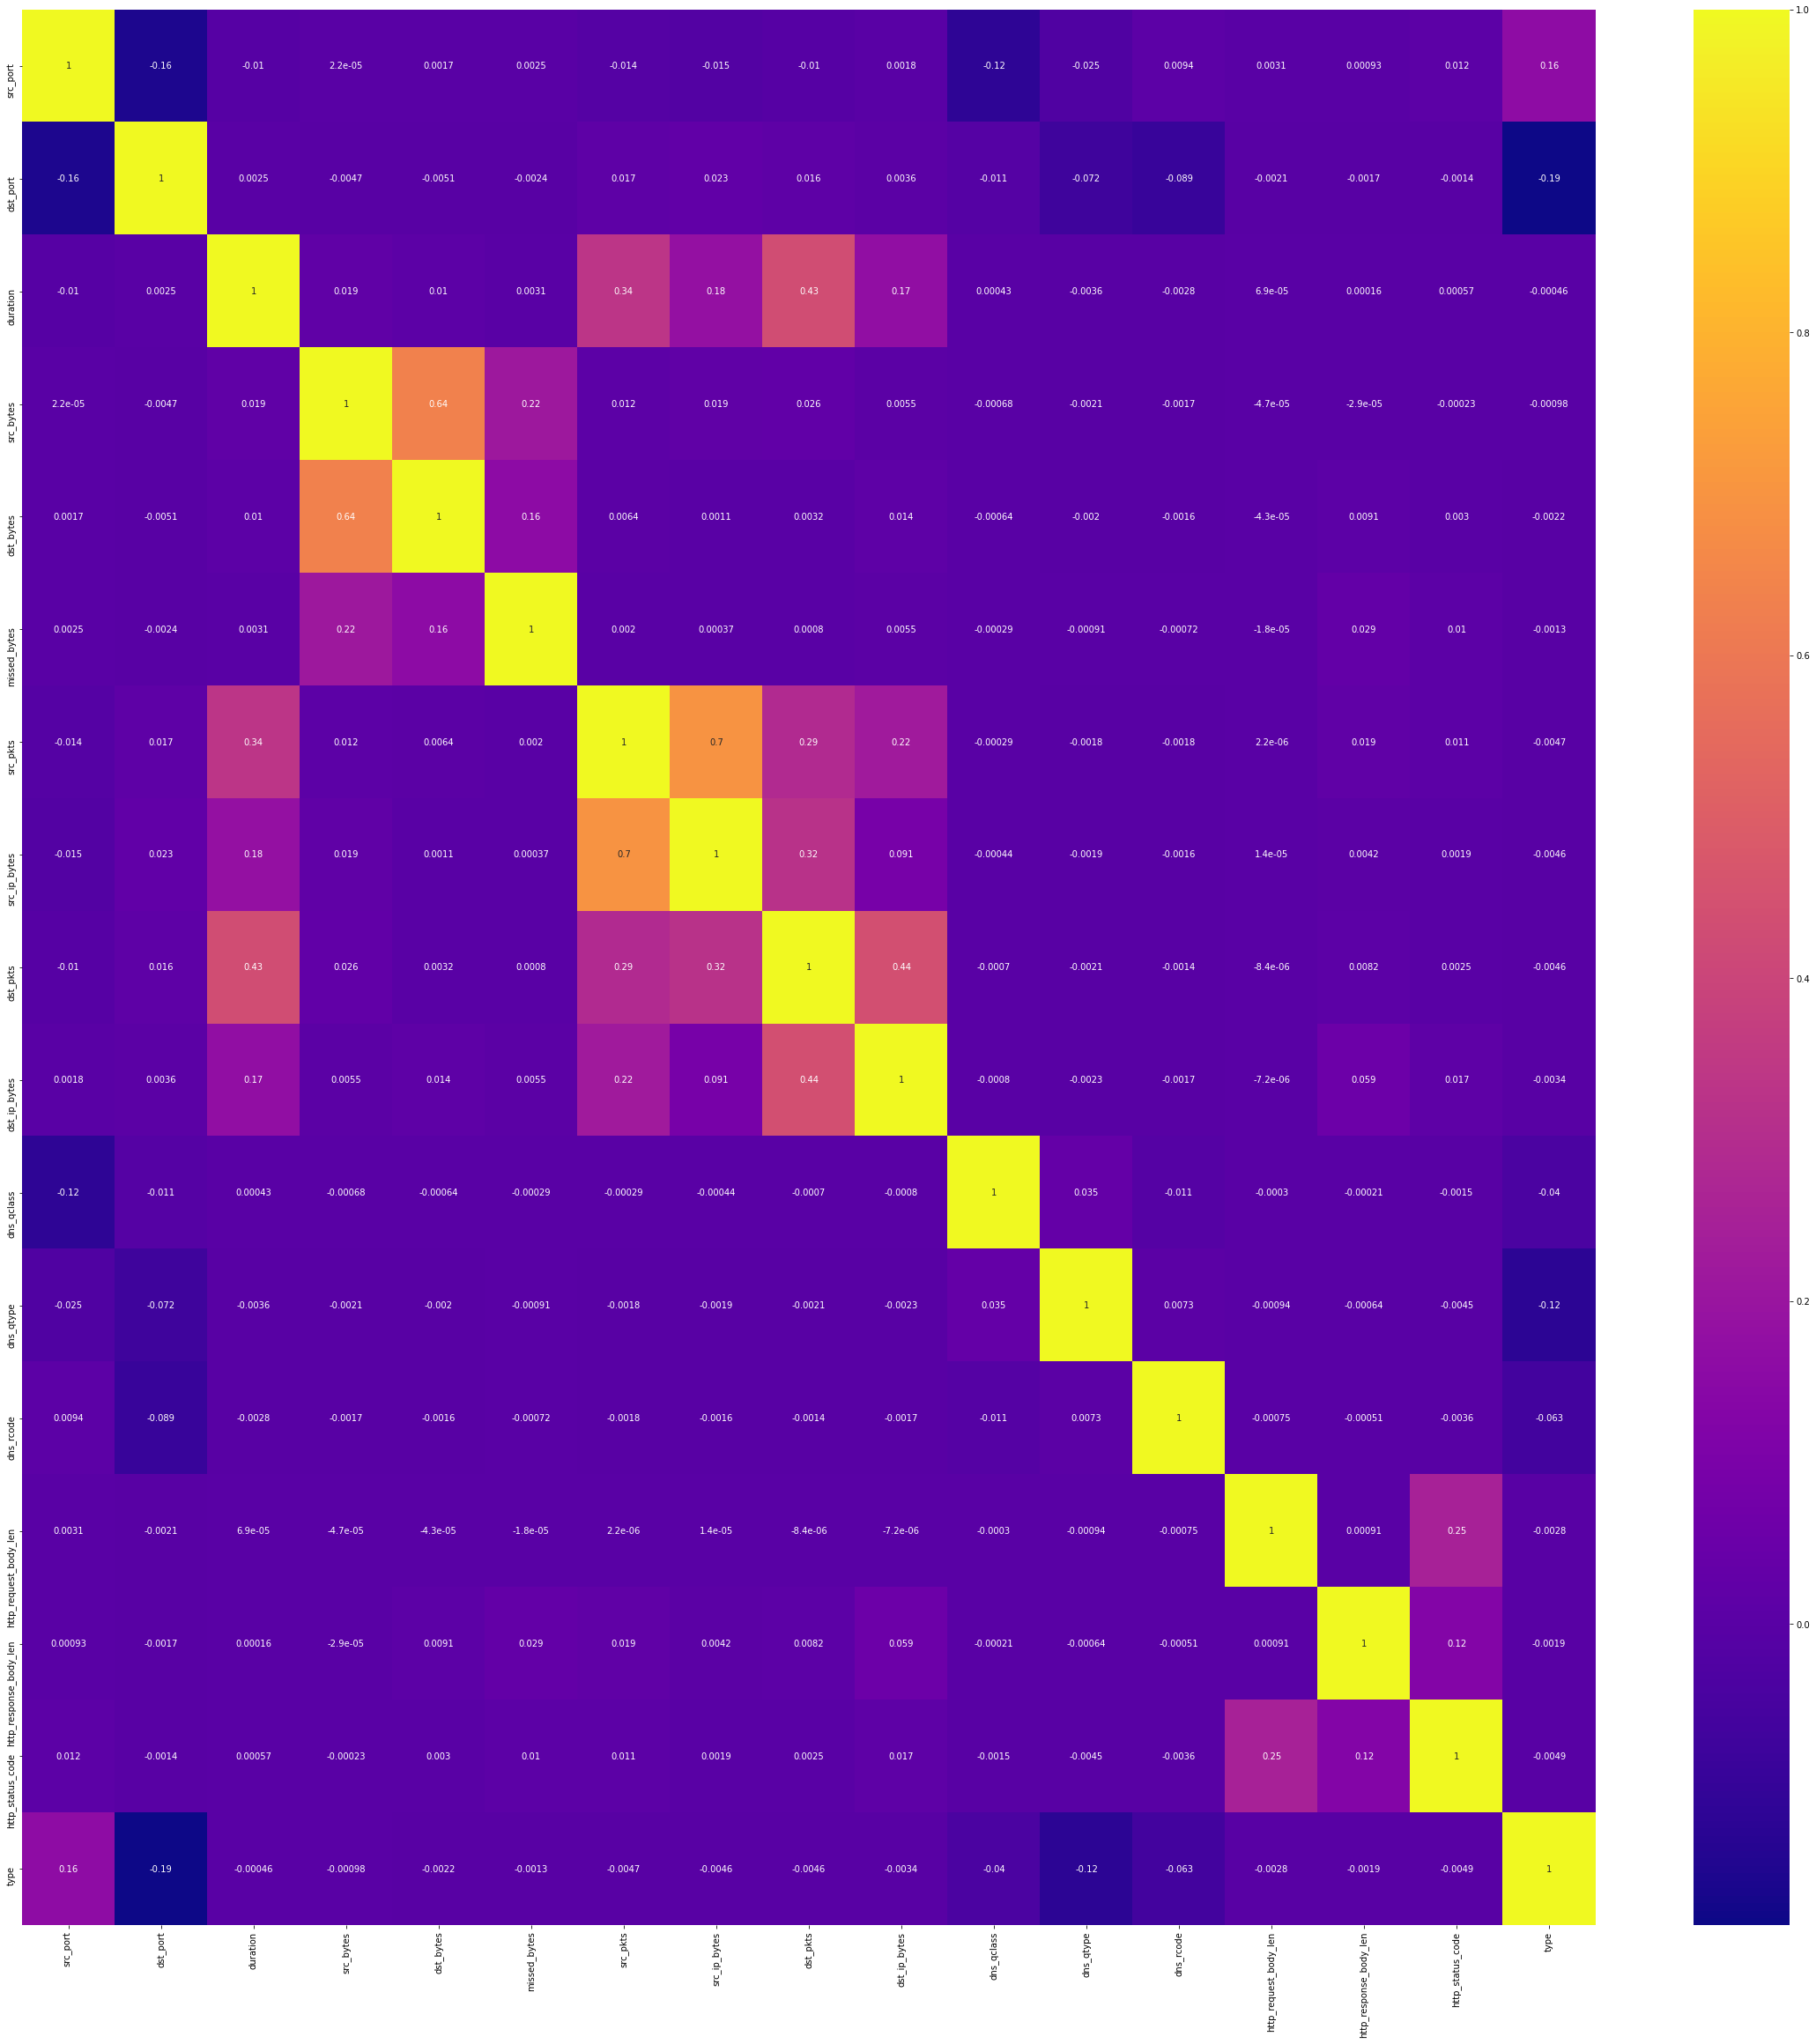

In [55]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

In [56]:
df.drop(columns=['duration','src_ip','dst_ip'],inplace=True)

In [57]:
df.shape

(461043, 34)

In [58]:
df.weird_name.value_counts()

-                                   459749
DNS_RR_unknown_type                    753
active_connection_reuse                275
data_before_established                109
bad_UDP_checksum                        68
bad_TCP_checksum                        52
connection_originator_SYN_ack           20
above_hole_data_without_any_acks         6
inappropriate_FIN                        3
dnp3_corrupt_header_checksum             3
possible_split_routing                   3
TCP_ack_underflow_or_misorder            2
Name: weird_name, dtype: int64

In [59]:
df.weird_notice.value_counts()

-    459749
F      1294
Name: weird_notice, dtype: int64

In [60]:
df.drop(columns=['weird_addl','weird_name','weird_notice'],inplace=True)

In [61]:
df.shape

(461043, 31)

In [62]:
df.drop(columns=['ssl_version','ssl_cipher','http_version'],inplace=True)

In [63]:
df.shape

(461043, 28)

In [64]:
df.service.value_counts()

-             280216
dns           116480
http           60720
ssl             2070
ftp             1065
gssapi           184
dce_rpc          136
smb              108
dhcp              46
smb;gssapi        18
Name: service, dtype: int64

In [65]:
df.drop(columns=['dns_query','http_user_agent'],inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   src_port                461043 non-null  int64 
 1   dst_port                461043 non-null  int64 
 2   proto                   461043 non-null  object
 3   service                 461043 non-null  object
 4   src_bytes               461043 non-null  int64 
 5   dst_bytes               461043 non-null  int64 
 6   conn_state              461043 non-null  object
 7   missed_bytes            461043 non-null  int64 
 8   src_pkts                461043 non-null  int64 
 9   src_ip_bytes            461043 non-null  int64 
 10  dst_pkts                461043 non-null  int64 
 11  dst_ip_bytes            461043 non-null  int64 
 12  dns_qclass              461043 non-null  int64 
 13  dns_qtype               461043 non-null  int64 
 14  dns_rcode               461043 non-n

In [67]:
df.proto.value_counts()

tcp     282076
udp     173087
icmp      5880
Name: proto, dtype: int64

In [68]:
label_en=LabelEncoder()
df['proto']=label_en.fit_transform(df['proto'])
df['service']=label_en.fit_transform(df['service'])
df['conn_state']=label_en.fit_transform(df['conn_state'])

In [69]:
df.head()

,src_port,dst_port,proto,service,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_resumed,ssl_established,http_trans_depth,http_request_body_len,http_response_body_len,http_status_code,type
0,1883,52976,1,0,1762852,41933215,0,0,252181,14911156,2,236,0,0,0,-,-,-,-,-,-,-,0,0,0,0
1,47260,15600,2,0,0,0,6,0,1,63,0,0,0,0,0,-,-,-,-,-,-,-,0,0,0,0
2,1880,51782,1,0,0,0,0,0,0,0,0,0,0,0,0,-,-,-,-,-,-,-,0,0,0,0
3,34296,10502,1,0,0,0,0,0,0,0,0,0,0,0,0,-,-,-,-,-,-,-,0,0,0,0
4,46608,53,2,3,0,298,12,0,0,0,2,354,0,0,0,-,-,-,-,-,-,-,0,0,0,0


In [70]:
df.proto.value_counts()

1    282076
2    173087
0      5880
Name: proto, dtype: int64

In [71]:
df.service.value_counts()

0    280216
3    116480
6     60720
9      2070
4      1065
5       184
1       136
7       108
2        46
8        18
Name: service, dtype: int64

In [72]:
df.conn_state.value_counts()

10    123512
6     113495
0     111842
1      45036
12     22053
11     18138
7      13843
9       6642
4       2360
5       1724
2       1518
8        708
3        172
Name: conn_state, dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   src_port                461043 non-null  int64 
 1   dst_port                461043 non-null  int64 
 2   proto                   461043 non-null  int64 
 3   service                 461043 non-null  int64 
 4   src_bytes               461043 non-null  int64 
 5   dst_bytes               461043 non-null  int64 
 6   conn_state              461043 non-null  int64 
 7   missed_bytes            461043 non-null  int64 
 8   src_pkts                461043 non-null  int64 
 9   src_ip_bytes            461043 non-null  int64 
 10  dst_pkts                461043 non-null  int64 
 11  dst_ip_bytes            461043 non-null  int64 
 12  dns_qclass              461043 non-null  int64 
 13  dns_qtype               461043 non-null  int64 
 14  dns_rcode               461043 non-n

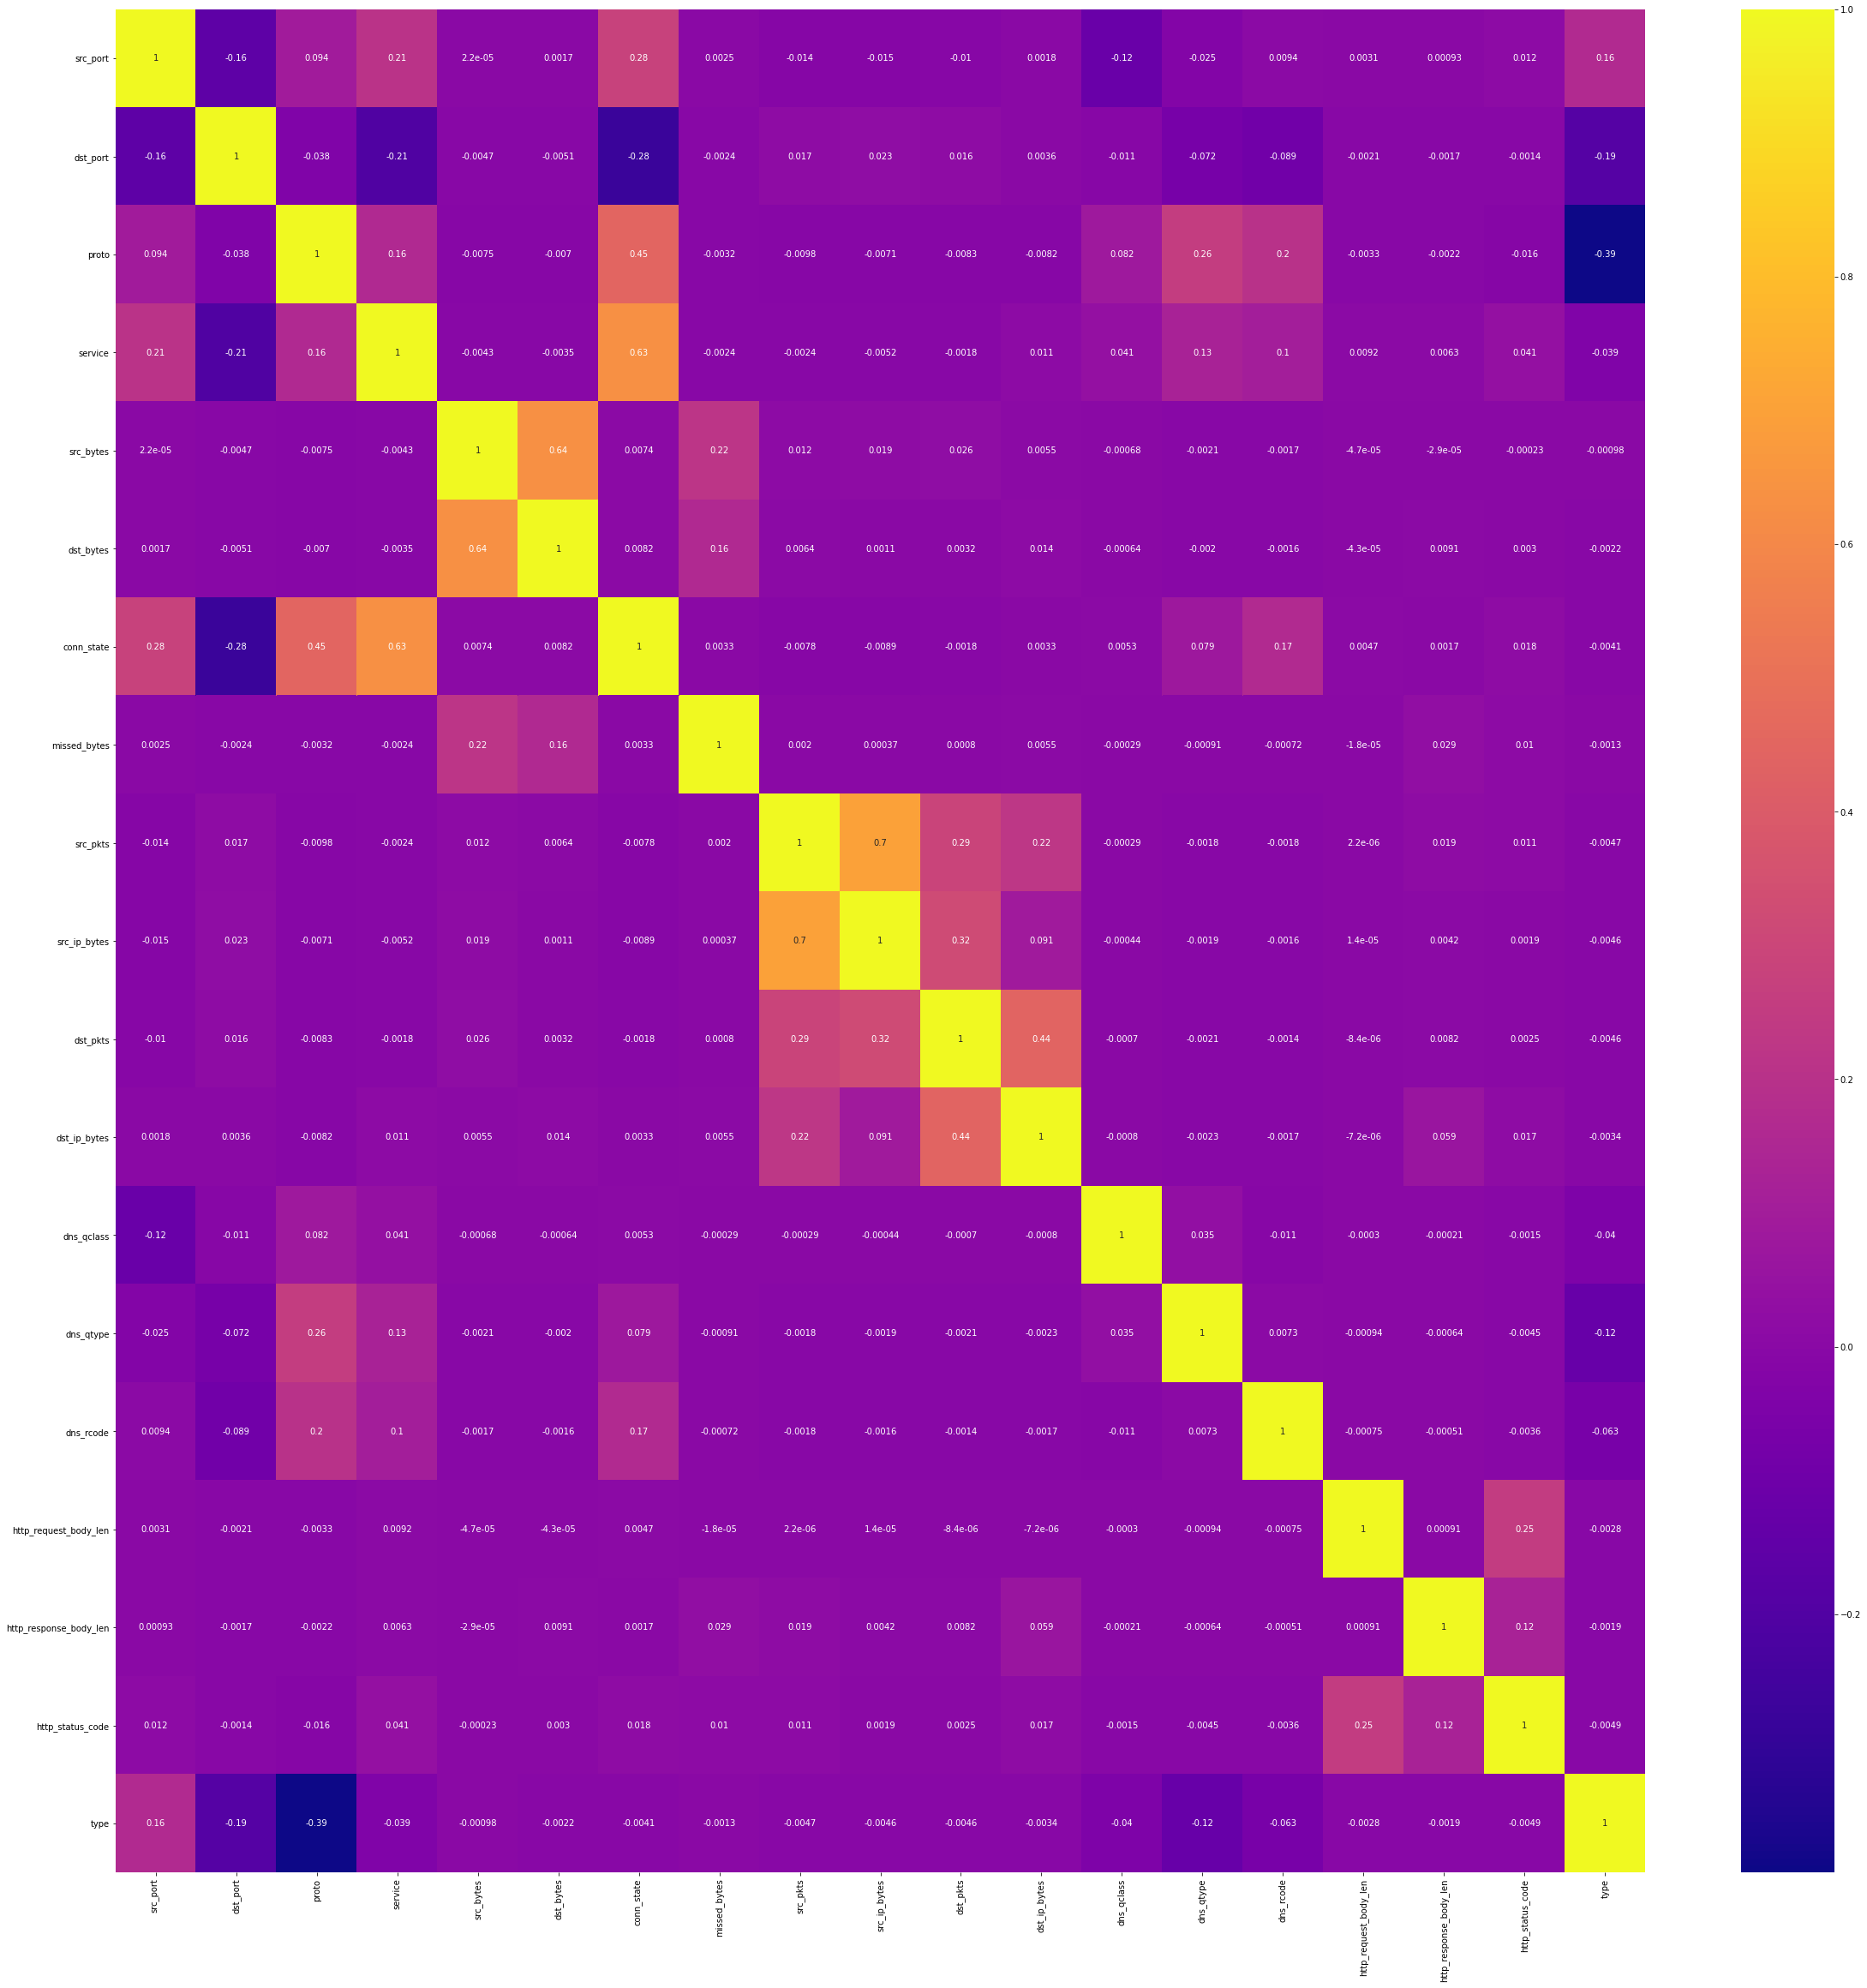

In [74]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

In [75]:
df.dns_AA.unique()

array(['-', 'F', 'T'], dtype=object)

In [76]:
df.dns_RD.unique()

array(['-', 'F', 'T'], dtype=object)

In [78]:
df.dns_RA.unique()

array(['-', 'F', 'T'], dtype=object)

In [79]:
df.dns_rejected.unique()

array(['-', 'F', 'T'], dtype=object)

In [81]:
df.ssl_resumed.unique()

array(['-', 'F', 'T'], dtype=object)

In [82]:
dict ={'-':0, 'T':1, 'F':2}
df['dns_AA']=df['dns_AA'].map(dict)
df['dns_RD']=df['dns_RD'].map(dict)
df['dns_RA']=df['dns_RA'].map(dict)
df['dns_rejected']=df['dns_rejected'].map(dict)
df['ssl_resumed']=df['ssl_resumed'].map(dict)
df['ssl_established']=df['ssl_established'].map(dict)


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   src_port                461043 non-null  int64 
 1   dst_port                461043 non-null  int64 
 2   proto                   461043 non-null  int64 
 3   service                 461043 non-null  int64 
 4   src_bytes               461043 non-null  int64 
 5   dst_bytes               461043 non-null  int64 
 6   conn_state              461043 non-null  int64 
 7   missed_bytes            461043 non-null  int64 
 8   src_pkts                461043 non-null  int64 
 9   src_ip_bytes            461043 non-null  int64 
 10  dst_pkts                461043 non-null  int64 
 11  dst_ip_bytes            461043 non-null  int64 
 12  dns_qclass              461043 non-null  int64 
 13  dns_qtype               461043 non-null  int64 
 14  dns_rcode               461043 non-n

In [84]:
df.dns_AA.value_counts()

0    365158
2     81279
1     14606
Name: dns_AA, dtype: int64

In [85]:
df.http_trans_depth.unique()

array(['-', '1', '2', '10', '3', '4', '5', '6', '7', '8', '9'],
      dtype=object)

In [86]:
depth= {'-':0, '1':1,'2':2, '3':3,'4':4, '5':5, '6':6,'7':7, '8':8, '9':9, '10':10}
df['http_trans_depth']=df['http_trans_depth'].map(depth)

In [87]:
df.http_trans_depth.unique()

array([ 0,  1,  2, 10,  3,  4,  5,  6,  7,  8,  9])

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   src_port                461043 non-null  int64
 1   dst_port                461043 non-null  int64
 2   proto                   461043 non-null  int64
 3   service                 461043 non-null  int64
 4   src_bytes               461043 non-null  int64
 5   dst_bytes               461043 non-null  int64
 6   conn_state              461043 non-null  int64
 7   missed_bytes            461043 non-null  int64
 8   src_pkts                461043 non-null  int64
 9   src_ip_bytes            461043 non-null  int64
 10  dst_pkts                461043 non-null  int64
 11  dst_ip_bytes            461043 non-null  int64
 12  dns_qclass              461043 non-null  int64
 13  dns_qtype               461043 non-null  int64
 14  dns_rcode               461043 non-null  int64
 15  

In [89]:
df.drop(columns=['proto','dns_AA','http_status_code','dns_RA','dns_RD','dns_rejected','dns_qtype','dns_rcode','dns_qclass','missed_bytes','ssl_resumed','ssl_established'],inplace=True)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   src_port                461043 non-null  int64
 1   dst_port                461043 non-null  int64
 2   service                 461043 non-null  int64
 3   src_bytes               461043 non-null  int64
 4   dst_bytes               461043 non-null  int64
 5   conn_state              461043 non-null  int64
 6   src_pkts                461043 non-null  int64
 7   src_ip_bytes            461043 non-null  int64
 8   dst_pkts                461043 non-null  int64
 9   dst_ip_bytes            461043 non-null  int64
 10  http_trans_depth        461043 non-null  int64
 11  http_request_body_len   461043 non-null  int64
 12  http_response_body_len  461043 non-null  int64
 13  type                    461043 non-null  int64
dtypes: int64(14)
memory usage: 49.2 MB


In [91]:
df.drop(columns=['http_trans_depth','http_request_body_len','http_response_body_len'],inplace=True)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   src_port      461043 non-null  int64
 1   dst_port      461043 non-null  int64
 2   service       461043 non-null  int64
 3   src_bytes     461043 non-null  int64
 4   dst_bytes     461043 non-null  int64
 5   conn_state    461043 non-null  int64
 6   src_pkts      461043 non-null  int64
 7   src_ip_bytes  461043 non-null  int64
 8   dst_pkts      461043 non-null  int64
 9   dst_ip_bytes  461043 non-null  int64
 10  type          461043 non-null  int64
dtypes: int64(11)
memory usage: 38.7 MB


In [93]:
df.head()

,src_port,dst_port,service,src_bytes,dst_bytes,conn_state,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,type
0,1883,52976,0,1762852,41933215,0,252181,14911156,2,236,0
1,47260,15600,0,0,0,6,1,63,0,0,0
2,1880,51782,0,0,0,0,0,0,0,0,0
3,34296,10502,0,0,0,0,0,0,0,0,0
4,46608,53,3,0,298,12,0,0,2,354,0


In [94]:
df.shape

(461043, 11)

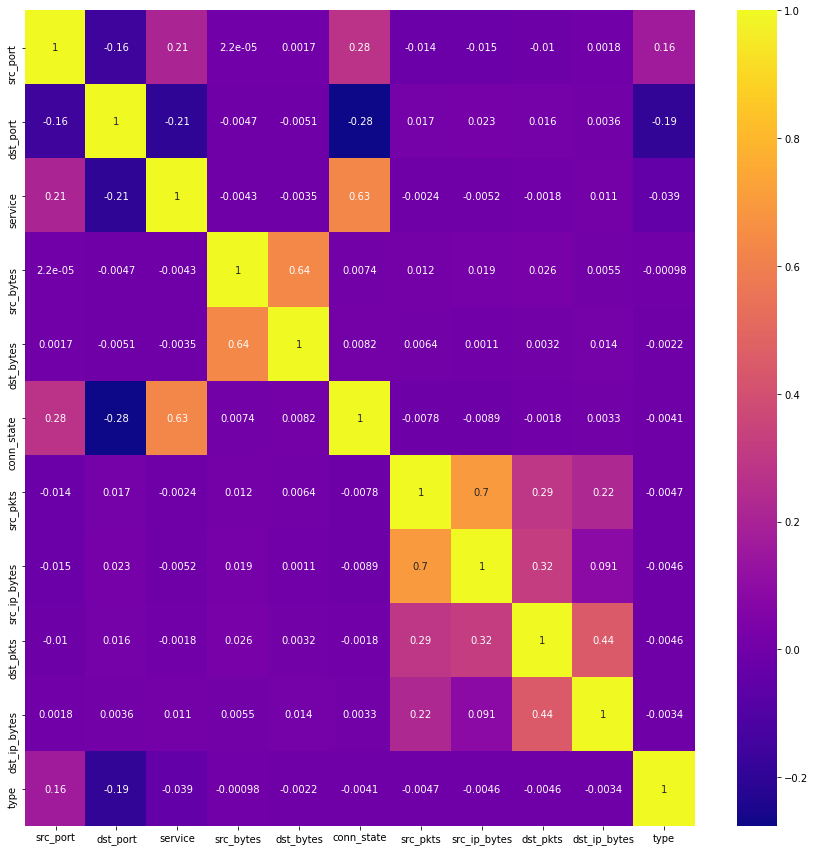

In [95]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

**FROM THE CORRELATION MATRIX WE CAN SEE THAT FEATURES TYPE NS SRC_BYTES HAVE VERY LOW FREQUENCY, SO WE CAN DROP THAT FEATURE TOO**

In [96]:
df.drop(columns=['src_bytes'],inplace=True)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   src_port      461043 non-null  int64
 1   dst_port      461043 non-null  int64
 2   service       461043 non-null  int64
 3   dst_bytes     461043 non-null  int64
 4   conn_state    461043 non-null  int64
 5   src_pkts      461043 non-null  int64
 6   src_ip_bytes  461043 non-null  int64
 7   dst_pkts      461043 non-null  int64
 8   dst_ip_bytes  461043 non-null  int64
 9   type          461043 non-null  int64
dtypes: int64(10)
memory usage: 35.2 MB


**SPLITIING OF DATA INTO TRAIN AND TEST**

In [100]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, test_index in split.split(df, df['type']):
    strat_train = df.loc[train_index]
    strat_test = df.loc[test_index]
strat_train['type'].value_counts()
data = strat_train.copy()

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

##Numpy array output 
data_num = my_pipe.fit_transform(data)
data_num.shape

(345782, 10)

In [102]:
from sklearn.svm import SVC
from sklearn import metrics

##prepare for training
x = data.drop('type', axis = 1)
y = data['type'].copy()

X =my_pipe.fit_transform(x)

classifier = SVC(C=10, gamma=1, kernel="rbf", random_state = 1)
classifier.fit(X,y)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [103]:
X_test = strat_test.drop('type', axis=1)
x_test = my_pipe.fit_transform(X_test)
y_test = strat_test['type'].copy()

In [105]:
y_pred = classifier.predict(x_test)

In [106]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     75000
           1       0.86      0.64      0.73      5000
           2       1.00      0.92      0.96      5000
           3       0.73      0.71      0.72      5000
           4       0.51      0.13      0.21       261
           5       0.95      1.00      0.98      5000
           6       0.79      0.72      0.75      5000
           7       0.95      0.96      0.95      5000
           8       0.89      0.77      0.83      5000
           9       0.77      0.82      0.79      5000

    accuracy                           0.92    115261
   macro avg       0.84      0.76      0.79    115261
weighted avg       0.92      0.92      0.92    115261



In [107]:
cm = metrics.confusion_matrix(y_test, y_pred)

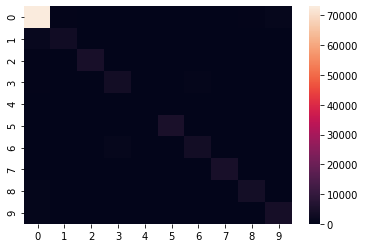

In [108]:
import seaborn as sns 
sns.heatmap(cm)

In [109]:
cm

array([[73065,   385,     0,     9,    16,     0,    21,   171,   433,
          900],
       [ 1478,  3183,     0,    89,     1,     0,   124,    31,     0,
           94],
       [  385,     1,  4602,     1,     8,     0,     2,     0,     0,
            1],
       [  570,   100,     0,  3533,     0,     0,   697,     0,    12,
           88],
       [  213,     2,     0,     5,    35,     0,     1,     0,     4,
            1],
       [   12,     0,     0,     0,     0,  4988,     0,     0,     0,
            0],
       [   81,     2,     0,  1122,     3,   158,  3607,     0,     0,
           27],
       [  149,     0,     0,     0,     0,     0,     0,  4797,     6,
           48],
       [  847,     1,     0,     0,     5,    79,    83,    59,  3851,
           75],
       [  788,     9,     0,    60,     0,     0,    28,     0,     6,
         4109]])